In [2]:
import pandas as pd

df_umsatz = pd.read_csv("umsatzdaten_gekuerzt.csv")

print("\nUmsatzdaten CSV:")
print(df_umsatz.head())




Umsatzdaten CSV:
        id       Datum  Warengruppe      Umsatz
0  1307011  2013-07-01            1  148.828353
1  1307021  2013-07-02            1  159.793757
2  1307031  2013-07-03            1  111.885594
3  1307041  2013-07-04            1  168.864941
4  1307051  2013-07-05            1  171.280754



Umsatzdaten CSV:
        id       Datum  Warengruppe      Umsatz
0  1307011  2013-07-01            1  148.828353
1  1307021  2013-07-02            1  159.793757
2  1307031  2013-07-03            1  111.885594
3  1307041  2013-07-04            1  168.864941
4  1307051  2013-07-05            1  171.280754


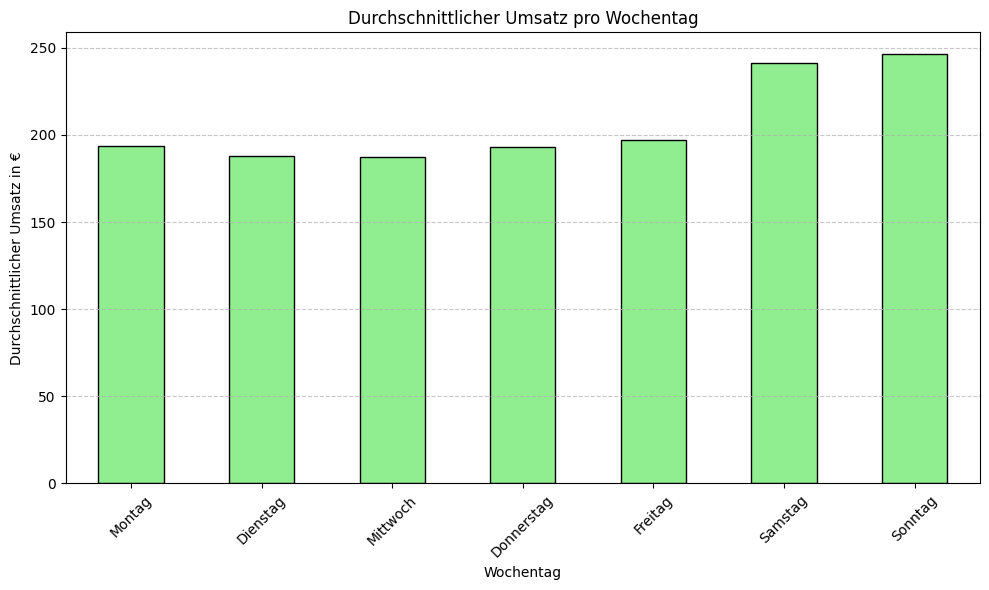

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei einlesen
df_umsatz = pd.read_csv("umsatzdaten_gekuerzt.csv")

# Ersten Einblick in die Daten
print("\nUmsatzdaten CSV:")
print(df_umsatz.head())

# Datum in datetime-Format umwandeln
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])

# Wochentag extrahieren (englisch) und dann ins Deutsche übersetzen
df_umsatz['Wochentag_EN'] = df_umsatz['Datum'].dt.day_name()

# Englische zu deutsche Wochentage
wochentage_deutsch = {
    'Monday': 'Montag',
    'Tuesday': 'Dienstag',
    'Wednesday': 'Mittwoch',
    'Thursday': 'Donnerstag',
    'Friday': 'Freitag',
    'Saturday': 'Samstag',
    'Sunday': 'Sonntag'
}

df_umsatz['Wochentag'] = df_umsatz['Wochentag_EN'].map(wochentage_deutsch)

# Durchschnittlichen Umsatz pro Wochentag berechnen
average_sales = df_umsatz.groupby('Wochentag')['Umsatz'].mean()

# Wochentage in logischer deutscher Reihenfolge bringen
weekday_order_de = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
average_sales = average_sales.reindex(weekday_order_de)

# Balkendiagramm erstellen
plt.figure(figsize=(10,6))
average_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Durchschnittlicher Umsatz pro Wochentag')
plt.ylabel('Durchschnittlicher Umsatz in €')
plt.xlabel('Wochentag')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



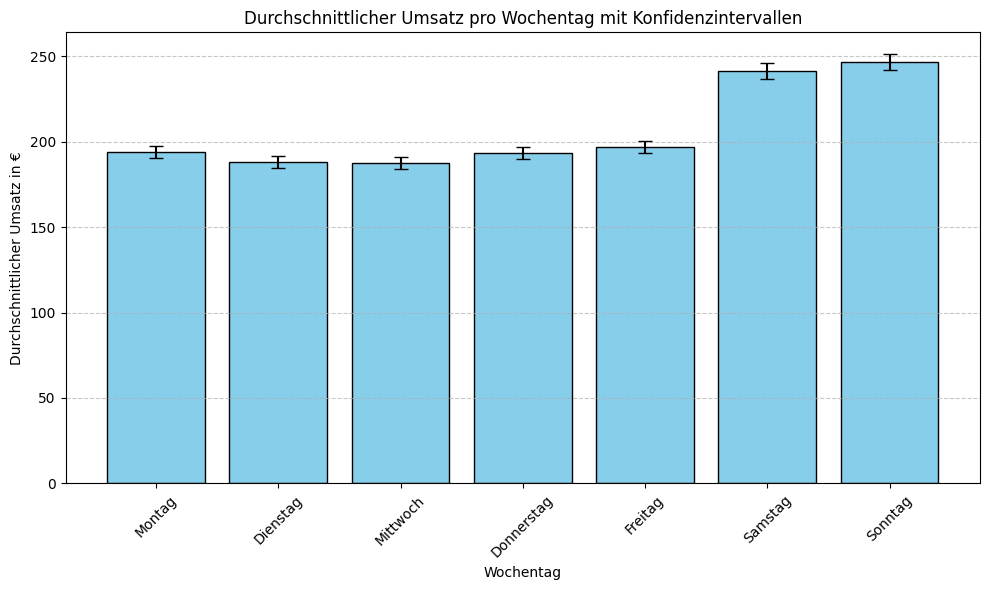

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

# CSV-Datei einlesen
df_umsatz = pd.read_csv("umsatzdaten_gekuerzt.csv")

# Datum in datetime-Format umwandeln
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])

# Wochentag extrahieren und auf Deutsch abbilden
df_umsatz['Wochentag_EN'] = df_umsatz['Datum'].dt.day_name()

wochentage_deutsch = {
    'Monday': 'Montag',
    'Tuesday': 'Dienstag',
    'Wednesday': 'Mittwoch',
    'Thursday': 'Donnerstag',
    'Friday': 'Freitag',
    'Saturday': 'Samstag',
    'Sunday': 'Sonntag'
}
df_umsatz['Wochentag'] = df_umsatz['Wochentag_EN'].map(wochentage_deutsch)

# Mittelwert und Standardfehler berechnen
grouped = df_umsatz.groupby('Wochentag')['Umsatz']
mean_sales = grouped.mean()
sem_sales = grouped.apply(sem)  # Standard Error of the Mean

# Wochentage korrekt sortieren
weekday_order = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
mean_sales = mean_sales.reindex(weekday_order)
sem_sales = sem_sales.reindex(weekday_order)

# Plot mit Fehlerbalken
plt.figure(figsize=(10,6))
plt.bar(mean_sales.index, mean_sales.values, yerr=sem_sales.values, capsize=5, color='skyblue', edgecolor='black')
plt.title('Durchschnittlicher Umsatz pro Wochentag mit Konfidenzintervallen')
plt.ylabel('Durchschnittlicher Umsatz in €')
plt.xlabel('Wochentag')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
